# Steam Optimization and Other Oddities 

***
## Data Import and Exploration

## Train Data Import and Exploration

In [ ]:
# Import modules & libraries
import numpy as np
import pandas as pd

from sklearn import metrics
from pandas_profiling import ProfileReport
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load training data

train_filepath = 'train.csv' 

#read into Pandas

df_train = pd.read_csv(train_filepath)

In [ ]:
#Shape of the dataframe
df_train.shape

(8004, 20)

In [ ]:
#Information about the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8004 entries, 0 to 8003
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CMPL_FAC_ID           8004 non-null   int64  
 1   SAND                  8004 non-null   object 
 2   SURV_DTE              8004 non-null   object 
 3   DIP                   8004 non-null   float64
 4   AVG_ORIG_OIL_SAT      8004 non-null   float64
 5   ORIG_OIL_H            8004 non-null   float64
 6   RMNG_OIL_H            8004 non-null   float64
 7   GAS_H                 8004 non-null   float64
 8   TOTAL_INJ             8004 non-null   float64
 9   TOTAL_GNTL_INJ        8004 non-null   int64  
 10  Lin_Dist_Inj_Factor   7781 non-null   float64
 11  SGMT_CUM_STM_INJ_1    6123 non-null   float64
 12  FT_DIST_PAT_1         5896 non-null   float64
 13  SGMT_CUM_STM_INJ_2    5750 non-null   float64
 14  FT_DIST_PAT_2         5505 non-null   float64
 15  SGMT_CUM_STM_INJ_3   

In [ ]:
df_train.describe()

,CMPL_FAC_ID,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,RMNG_OIL_H,GAS_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,PCT_DESAT_TO_ORIG
count,8.004000e+03,8004.000000,8004.000000,8004.000000,8004.00000,8004.000000,8.004000e+03,8.004000e+03,7781.000000,6.123000e+03,5896.000000,5.750000e+03,5505.000000,5.765000e+03,5506.000000,8.004000e+03,8003.000000,8004.000000
mean,4.098586e+05,0.057144,0.319711,13.204581,9.35475,3.888812,2.620949e+08,1.726470e+06,0.370988,2.687419e+05,177.688263,2.596319e+05,334.374569,2.488604e+05,416.661097,1.697328e+07,0.369022,0.292837
std,3.935587e+05,0.026834,0.192961,9.104953,8.72167,6.036003,2.159242e+08,1.717851e+06,0.140632,2.748732e+05,66.555558,2.718578e+05,58.345060,2.963327e+05,58.558453,1.706817e+07,0.099683,0.380297
min,4.350000e+02,0.010000,0.000000,0.030000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.010000,0.000000e+00,8.000000,0.000000e+00,90.000000,0.000000e+00,176.000000,0.000000e+00,0.010000,0.000000
25%,1.424050e+05,0.040000,0.160000,6.500000,2.35250,0.000000,9.028323e+07,4.019620e+05,0.279000,6.048050e+04,138.000000,4.390300e+04,299.000000,3.122200e+04,381.000000,4.371323e+06,0.307443,0.000000
50%,1.429040e+05,0.050000,0.310000,11.600000,7.50000,0.290000,2.127572e+08,1.296334e+06,0.377000,2.001640e+05,176.000000,1.903805e+05,336.000000,1.708010e+05,418.000000,1.085766e+07,0.370692,0.030000
75%,9.853000e+05,0.070000,0.460000,18.500000,14.00000,6.000000,3.905949e+08,2.545681e+06,0.458000,3.927480e+05,225.000000,3.877835e+05,363.000000,3.554940e+05,468.000000,2.490476e+07,0.424845,0.590000
max,1.009291e+06,0.340000,0.820000,54.510000,54.51000,51.000000,9.810246e+08,2.044877e+07,0.878000,3.063659e+06,512.000000,4.961914e+06,555.000000,4.692147e+06,617.000000,8.734901e+07,0.847723,1.000000


In [ ]:
df_train['FT_DIST_PAT_1_MAX'] = df_train.groupby(['CMPL_FAC_ID'])['FT_DIST_PAT_1'].transform('max')
df_train['FT_DIST_PAT_2_MAX'] = df_train.groupby(['CMPL_FAC_ID'])['FT_DIST_PAT_2'].transform('max')
df_train['FT_DIST_PAT_3_MAX'] = df_train.groupby(['CMPL_FAC_ID'])['FT_DIST_PAT_3'].transform('max')
for column in ['FT_DIST_PAT_1', 'FT_DIST_PAT_2', 'FT_DIST_PAT_3']:
    df_train[column] = np.where(df_train[column].isnull(), df_train[str(column)+'_MAX'], df_train[column])
df_train = df_train.drop(columns=["FT_DIST_PAT_1_MAX", "FT_DIST_PAT_2_MAX", "FT_DIST_PAT_3_MAX"])
df_train.head(40)

,CMPL_FAC_ID,SAND,SURV_DTE,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,RMNG_OIL_H,GAS_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,PCT_DESAT_TO_ORIG
0,435,TULS_D1,10/25/2012,0.05,0.70,21.06,0.00,21.06,1.246190e+08,3164720,0.269,NaN,130.0,551231.0,372.0,942465.0,465.0,8904160,0.410639,1.00
1,435,TULS_D1,9/2/2016,0.05,0.70,21.06,0.00,21.06,1.791845e+08,4085829,0.302,NaN,130.0,963379.0,372.0,994686.0,465.0,18796208,0.380935,1.00
2,435,TULS_D2,1/1/1990,0.06,0.70,14.58,14.58,0.00,0.000000e+00,0,0.218,0.0,130.0,0.0,372.0,0.0,465.0,0,0.410639,0.00
3,435,TULS_D2,10/25/2012,0.06,0.70,14.58,3.00,11.58,1.246190e+08,511013,0.218,NaN,130.0,NaN,372.0,232391.0,465.0,8904160,0.410639,0.79
4,435,TULS_D2,9/2/2016,0.06,0.70,14.58,0.00,14.58,1.791845e+08,880407,0.229,NaN,130.0,NaN,372.0,416613.0,465.0,18796208,0.380935,1.00
5,435,TULS_D3,10/25/2012,0.08,0.50,34.87,22.50,12.37,1.246190e+08,2732929,0.311,297002.0,130.0,303999.0,372.0,404119.0,465.0,8904160,0.410639,0.35
6,435,TULS_D3,9/2/2016,0.08,0.50,34.87,13.50,21.37,1.791845e+08,4592459,0.355,613515.0,130.0,696977.0,372.0,632866.0,465.0,18796208,0.380935,0.61
7,435,TULS_E1,1/1/1990,0.07,0.19,5.50,5.50,0.00,0.000000e+00,0,0.275,0.0,130.0,0.0,372.0,0.0,465.0,0,0.410639,0.00
8,435,TULS_E1,10/25/2012,0.07,0.19,5.50,5.50,0.00,1.246190e+08,664495,0.275,39624.0,130.0,86907.0,372.0,187535.0,465.0,8904160,0.410639,0.00
9,435,TULS_E1,9/2/2016,0.07,0.19,5.50,5.50,0.00,1.791845e+08,1192252,0.307,39663.0,130.0,300859.0,372.0,253580.0,465.0,18796208,0.380935,0.00


In [ ]:
print(df_train.groupby(['CMPL_FAC_ID'])['FT_DIST_PAT_1'].transform('max').isna().sum())
print(df_train.groupby(['CMPL_FAC_ID'])['FT_DIST_PAT_2'].transform('max').isna().sum())
print(df_train.groupby(['CMPL_FAC_ID'])['FT_DIST_PAT_3'].transform('max').isna().sum())

680
1001
1117


In [ ]:
#Look at the first five rows
df_train.head()

,CMPL_FAC_ID,SAND,SURV_DTE,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,RMNG_OIL_H,GAS_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,PCT_DESAT_TO_ORIG
0,435,TULS_D1,10/25/2012,0.05,0.7,21.06,0.00,21.06,1.246190e+08,3164720,0.269,NaN,130.0,551231.0,372.0,942465.0,465.0,8904160,0.410639,1.00
1,435,TULS_D1,9/2/2016,0.05,0.7,21.06,0.00,21.06,1.791845e+08,4085829,0.302,NaN,130.0,963379.0,372.0,994686.0,465.0,18796208,0.380935,1.00
2,435,TULS_D2,1/1/1990,0.06,0.7,14.58,14.58,0.00,0.000000e+00,0,0.218,0.0,130.0,0.0,372.0,0.0,465.0,0,0.410639,0.00
3,435,TULS_D2,10/25/2012,0.06,0.7,14.58,3.00,11.58,1.246190e+08,511013,0.218,NaN,130.0,NaN,372.0,232391.0,465.0,8904160,0.410639,0.79
4,435,TULS_D2,9/2/2016,0.06,0.7,14.58,0.00,14.58,1.791845e+08,880407,0.229,NaN,130.0,NaN,372.0,416613.0,465.0,18796208,0.380935,1.00


In [ ]:
df_train = df_train.astype({"SAND":'category'})
df_train['SURV_DTE'] = pd.to_datetime(df_train['SURV_DTE'])
df_train.head()

,CMPL_FAC_ID,SAND,SURV_DTE,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,RMNG_OIL_H,GAS_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,PCT_DESAT_TO_ORIG
0,435,TULS_D1,2012-10-25,0.05,0.7,21.06,0.00,21.06,1.246190e+08,3164720,0.269,NaN,130.0,551231.0,372.0,942465.0,465.0,8904160,0.410639,1.00
1,435,TULS_D1,2016-09-02,0.05,0.7,21.06,0.00,21.06,1.791845e+08,4085829,0.302,NaN,130.0,963379.0,372.0,994686.0,465.0,18796208,0.380935,1.00
2,435,TULS_D2,1990-01-01,0.06,0.7,14.58,14.58,0.00,0.000000e+00,0,0.218,0.0,130.0,0.0,372.0,0.0,465.0,0,0.410639,0.00
3,435,TULS_D2,2012-10-25,0.06,0.7,14.58,3.00,11.58,1.246190e+08,511013,0.218,NaN,130.0,NaN,372.0,232391.0,465.0,8904160,0.410639,0.79
4,435,TULS_D2,2016-09-02,0.06,0.7,14.58,0.00,14.58,1.791845e+08,880407,0.229,NaN,130.0,NaN,372.0,416613.0,465.0,18796208,0.380935,1.00


In [ ]:
df_train['SURV_DTE_YEAR'] = df_train['SURV_DTE'].apply(lambda num : num.year)
df_train['SURV_DTE_MONTH'] = df_train['SURV_DTE'].apply(lambda num : num.month)
df_train.head()

,CMPL_FAC_ID,SAND,SURV_DTE,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,RMNG_OIL_H,GAS_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,PCT_DESAT_TO_ORIG,SURV_DTE_YEAR,SURV_DTE_MONTH
0,435,TULS_D1,2012-10-25,0.05,0.7,21.06,0.00,21.06,1.246190e+08,3164720,0.269,NaN,130.0,551231.0,372.0,942465.0,465.0,8904160,0.410639,1.00,2012,10
1,435,TULS_D1,2016-09-02,0.05,0.7,21.06,0.00,21.06,1.791845e+08,4085829,0.302,NaN,130.0,963379.0,372.0,994686.0,465.0,18796208,0.380935,1.00,2016,9
2,435,TULS_D2,1990-01-01,0.06,0.7,14.58,14.58,0.00,0.000000e+00,0,0.218,0.0,130.0,0.0,372.0,0.0,465.0,0,0.410639,0.00,1990,1
3,435,TULS_D2,2012-10-25,0.06,0.7,14.58,3.00,11.58,1.246190e+08,511013,0.218,NaN,130.0,NaN,372.0,232391.0,465.0,8904160,0.410639,0.79,2012,10
4,435,TULS_D2,2016-09-02,0.06,0.7,14.58,0.00,14.58,1.791845e+08,880407,0.229,NaN,130.0,NaN,372.0,416613.0,465.0,18796208,0.380935,1.00,2016,9


In [ ]:
# df_train['SURV_DTE_Date'] = df_train['SURV_DTE'].apply(lambda num : num.day)
# df_train.head()

In [ ]:
df_train['TOTAL_INJ'] = df_train['TOTAL_INJ']/(1e8)
df_train.head()

,CMPL_FAC_ID,SAND,SURV_DTE,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,RMNG_OIL_H,GAS_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,PCT_DESAT_TO_ORIG,SURV_DTE_YEAR,SURV_DTE_MONTH
0,435,TULS_D1,2012-10-25,0.05,0.7,21.06,0.00,21.06,1.246190,3164720,0.269,NaN,130.0,551231.0,372.0,942465.0,465.0,8904160,0.410639,1.00,2012,10
1,435,TULS_D1,2016-09-02,0.05,0.7,21.06,0.00,21.06,1.791845,4085829,0.302,NaN,130.0,963379.0,372.0,994686.0,465.0,18796208,0.380935,1.00,2016,9
2,435,TULS_D2,1990-01-01,0.06,0.7,14.58,14.58,0.00,0.000000,0,0.218,0.0,130.0,0.0,372.0,0.0,465.0,0,0.410639,0.00,1990,1
3,435,TULS_D2,2012-10-25,0.06,0.7,14.58,3.00,11.58,1.246190,511013,0.218,NaN,130.0,NaN,372.0,232391.0,465.0,8904160,0.410639,0.79,2012,10
4,435,TULS_D2,2016-09-02,0.06,0.7,14.58,0.00,14.58,1.791845,880407,0.229,NaN,130.0,NaN,372.0,416613.0,465.0,18796208,0.380935,1.00,2016,9


In [ ]:
type(df_train['SURV_DTE_YEAR'][0])

numpy.int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8004 entries, 0 to 8003
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CMPL_FAC_ID           8004 non-null   int64         
 1   SAND                  8004 non-null   category      
 2   SURV_DTE              8004 non-null   datetime64[ns]
 3   DIP                   8004 non-null   float64       
 4   AVG_ORIG_OIL_SAT      8004 non-null   float64       
 5   ORIG_OIL_H            8004 non-null   float64       
 6   RMNG_OIL_H            8004 non-null   float64       
 7   GAS_H                 8004 non-null   float64       
 8   TOTAL_INJ             8004 non-null   float64       
 9   TOTAL_GNTL_INJ        8004 non-null   int64         
 10  Lin_Dist_Inj_Factor   7781 non-null   float64       
 11  SGMT_CUM_STM_INJ_1    6123 non-null   float64       
 12  FT_DIST_PAT_1         7324 non-null   float64       
 13  SGMT_CUM_STM_INJ_2

In [ ]:
#df_train = df_train.drop(columns=["SAND"])

In [ ]:
le = LabelEncoder()
#le.fit(np.append(df_train["SAND"],df_test["SAND"])
le.fit(df_train["SAND"])
df_train["SAND"] = le.transform(df_train["SAND"])
df_train.head()

,CMPL_FAC_ID,SAND,SURV_DTE,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,RMNG_OIL_H,GAS_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,PCT_DESAT_TO_ORIG,SURV_DTE_YEAR,SURV_DTE_MONTH
0,435,10,2012-10-25,0.05,0.7,21.06,0.00,21.06,1.246190,3164720,0.269,NaN,130.0,551231.0,372.0,942465.0,465.0,8904160,0.410639,1.00,2012,10
1,435,10,2016-09-02,0.05,0.7,21.06,0.00,21.06,1.791845,4085829,0.302,NaN,130.0,963379.0,372.0,994686.0,465.0,18796208,0.380935,1.00,2016,9
2,435,11,1990-01-01,0.06,0.7,14.58,14.58,0.00,0.000000,0,0.218,0.0,130.0,0.0,372.0,0.0,465.0,0,0.410639,0.00,1990,1
3,435,11,2012-10-25,0.06,0.7,14.58,3.00,11.58,1.246190,511013,0.218,NaN,130.0,NaN,372.0,232391.0,465.0,8904160,0.410639,0.79,2012,10
4,435,11,2016-09-02,0.06,0.7,14.58,0.00,14.58,1.791845,880407,0.229,NaN,130.0,NaN,372.0,416613.0,465.0,18796208,0.380935,1.00,2016,9


In [ ]:
df_train = df_train.fillna(df_train.mean())

In [ ]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
create_report(df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew after Log Transformation: -0.608531
Kurtosis after Log Transformation: 4.257003


count    8004.000000
mean       -2.970172
std         0.483280
min        -4.605170
25%        -3.218876
50%        -2.995732
75%        -2.659260
max        -1.078810
Name: DIP, dtype: float64

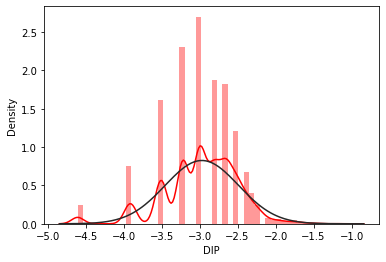

In [ ]:
import seaborn as sns
from scipy.stats import skew, skewtest, norm
import scipy.stats as st
from scipy.stats import kurtosis
from scipy.stats import boxcox
#log transformation
df_train['DIP'] = np.log(df_train['DIP']) 

#check distribution,skewness and kurtosis
sns.distplot(df_train['DIP'], fit=norm,color ="r")
print("Skew after Log Transformation: %f" % df_train['DIP'].skew())
print("Kurtosis after Log Transformation: %f" % kurtosis(df_train['DIP'],fisher = False))
df_train['DIP'].describe()


Skew after Log Transformation: -0.055324
Kurtosis after Log Transformation: 2.599509


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    8004.000000
mean        3.386031
std         1.318936
min         0.173205
25%         2.549510
50%         3.405877
75%         4.301163
max         7.383089
Name: ORIG_OIL_H, dtype: float64

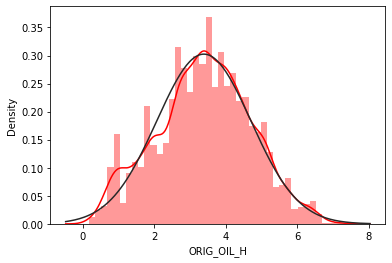

In [ ]:
#log transformation
df_train['ORIG_OIL_H'] = np.sqrt(df_train['ORIG_OIL_H']) 

#check distribution,skewness and kurtosis
sns.distplot(df_train['ORIG_OIL_H'], fit=norm,color ="r")
print("Skew after Log Transformation: %f" % df_train['ORIG_OIL_H'].skew())
print("Kurtosis after Log Transformation: %f" % kurtosis(df_train['ORIG_OIL_H'],fisher = False))
df_train['ORIG_OIL_H'].describe()

Skew after Log Transformation: -3.052813
Kurtosis after Log Transformation: 10.729397


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    8004.000000
mean       17.676986
std         5.106906
min         0.000000
25%        18.318462
50%        19.175662
75%        19.783182
max        20.704108
Name: TOTAL_INJ, dtype: float64

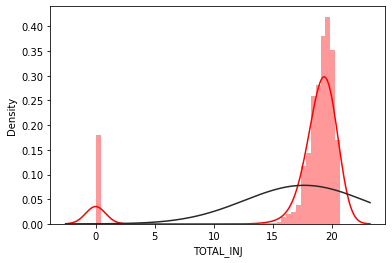

In [ ]:
#log transformation
df_train['TOTAL_INJ'] = np.log(df_train['TOTAL_INJ']+1) 

#df_train['TOTAL_INJ'] = np.sqrt(df_train['TOTAL_INJ']) 

#check distribution,skewness and kurtosis
sns.distplot(df_train['TOTAL_INJ'], fit=norm,color ="r")
print("Skew after Log Transformation: %f" % df_train['TOTAL_INJ'].skew())
print("Kurtosis after Log Transformation: %f" % kurtosis(df_train['TOTAL_INJ'],fisher = False))
df_train['TOTAL_INJ'].describe()

In [ ]:
df_train.head()

,CMPL_FAC_ID,SAND,SURV_DTE,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,RMNG_OIL_H,GAS_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,PCT_DESAT_TO_ORIG,SURV_DTE_YEAR,SURV_DTE_MONTH
0,435,10,2012-10-25,-2.995732,0.7,4.589118,0.00,21.06,18.640772,3164720,0.269,268741.902009,130.0,551231.000000,372.0,942465.0,465.0,8904160,0.410639,1.00,2012,10
1,435,10,2016-09-02,-2.995732,0.7,4.589118,0.00,21.06,19.003926,4085829,0.302,268741.902009,130.0,963379.000000,372.0,994686.0,465.0,18796208,0.380935,1.00,2016,9
2,435,11,1990-01-01,-2.813411,0.7,3.818377,14.58,0.00,0.000000,0,0.218,0.000000,130.0,0.000000,372.0,0.0,465.0,0,0.410639,0.00,1990,1
3,435,11,2012-10-25,-2.813411,0.7,3.818377,3.00,11.58,18.640772,511013,0.218,268741.902009,130.0,259631.945217,372.0,232391.0,465.0,8904160,0.410639,0.79,2012,10
4,435,11,2016-09-02,-2.813411,0.7,3.818377,0.00,14.58,19.003926,880407,0.229,268741.902009,130.0,259631.945217,372.0,416613.0,465.0,18796208,0.380935,1.00,2016,9


In [ ]:
df_train = df_train.drop(columns=["SURV_DTE"])
df_train = df_train.drop(columns=["GAS_H", "RMNG_OIL_H"])
#df_train = df_train.drop(columns=["CMPL_FAC_ID"])

In [ ]:
df_train.columns

Index(['CMPL_FAC_ID', 'SAND', 'DIP', 'AVG_ORIG_OIL_SAT', 'ORIG_OIL_H',
       'TOTAL_INJ', 'TOTAL_GNTL_INJ', 'Lin_Dist_Inj_Factor',
       'SGMT_CUM_STM_INJ_1', 'FT_DIST_PAT_1', 'SGMT_CUM_STM_INJ_2',
       'FT_DIST_PAT_2', 'SGMT_CUM_STM_INJ_3', 'FT_DIST_PAT_3', 'TOTAL_PROD',
       'Lin_Dist_Prod_Factor', 'PCT_DESAT_TO_ORIG', 'SURV_DTE_YEAR',
       'SURV_DTE_MONTH'],
      dtype='object')

In [ ]:
df_train.head()

,CMPL_FAC_ID,SAND,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,PCT_DESAT_TO_ORIG,SURV_DTE_YEAR,SURV_DTE_MONTH
0,435,10,-2.995732,0.7,4.589118,18.640772,3164720,0.269,268741.902009,130.0,551231.000000,372.0,942465.0,465.0,8904160,0.410639,1.00,2012,10
1,435,10,-2.995732,0.7,4.589118,19.003926,4085829,0.302,268741.902009,130.0,963379.000000,372.0,994686.0,465.0,18796208,0.380935,1.00,2016,9
2,435,11,-2.813411,0.7,3.818377,0.000000,0,0.218,0.000000,130.0,0.000000,372.0,0.0,465.0,0,0.410639,0.00,1990,1
3,435,11,-2.813411,0.7,3.818377,18.640772,511013,0.218,268741.902009,130.0,259631.945217,372.0,232391.0,465.0,8904160,0.410639,0.79,2012,10
4,435,11,-2.813411,0.7,3.818377,19.003926,880407,0.229,268741.902009,130.0,259631.945217,372.0,416613.0,465.0,18796208,0.380935,1.00,2016,9


In [ ]:
df_train.columns[:-1]

Index(['CMPL_FAC_ID', 'SAND', 'DIP', 'AVG_ORIG_OIL_SAT', 'ORIG_OIL_H',
       'TOTAL_INJ', 'TOTAL_GNTL_INJ', 'Lin_Dist_Inj_Factor',
       'SGMT_CUM_STM_INJ_1', 'FT_DIST_PAT_1', 'SGMT_CUM_STM_INJ_2',
       'FT_DIST_PAT_2', 'SGMT_CUM_STM_INJ_3', 'FT_DIST_PAT_3', 'TOTAL_PROD',
       'Lin_Dist_Prod_Factor', 'PCT_DESAT_TO_ORIG', 'SURV_DTE_YEAR'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_train_data = df_train.drop(columns=["PCT_DESAT_TO_ORIG"])
df_train_data.head()

,CMPL_FAC_ID,SAND,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,SURV_DTE_YEAR,SURV_DTE_MONTH
0,435,10,-2.995732,0.7,4.589118,18.640772,3164720,0.269,268741.902009,130.0,551231.000000,372.0,942465.0,465.0,8904160,0.410639,2012,10
1,435,10,-2.995732,0.7,4.589118,19.003926,4085829,0.302,268741.902009,130.0,963379.000000,372.0,994686.0,465.0,18796208,0.380935,2016,9
2,435,11,-2.813411,0.7,3.818377,0.000000,0,0.218,0.000000,130.0,0.000000,372.0,0.0,465.0,0,0.410639,1990,1
3,435,11,-2.813411,0.7,3.818377,18.640772,511013,0.218,268741.902009,130.0,259631.945217,372.0,232391.0,465.0,8904160,0.410639,2012,10
4,435,11,-2.813411,0.7,3.818377,19.003926,880407,0.229,268741.902009,130.0,259631.945217,372.0,416613.0,465.0,18796208,0.380935,2016,9


In [ ]:
xtrain, xval, ytrain, yval = train_test_split(
    #df_train[df_train.columns[:-1]],
    df_train_data, 
    df_train['PCT_DESAT_TO_ORIG'], 
    test_size=.15, 
    random_state=None, 
    shuffle=False
)

In [ ]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

##Fit scaler
scaler.fit(X=xtrain.values)

## Scale data
xtrain = scaler.transform(X=xtrain.values)
xval = scaler.transform(X=xval.values)

print(f"> Training inputs shape : {xtrain.shape}, Training targets shape : {ytrain.shape}")
print(f"> Validation inputs shape : {xval.shape}, Training targets shape : {yval.shape}")

> Training inputs shape : (7923, 18), Training targets shape : (7923,)
> Validation inputs shape : (81, 18), Training targets shape : (81,)


# Model Training

# Using optuna for hyperparameter tuning

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
def objective(trial, X, y, cv, scoring):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 400, 1000, step=200),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.03, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 9),
        "subsample": trial.suggest_float("subsample", 0.8, 1.0, step=0.1),
        "max_features": trial.suggest_categorical(
            "max_features", ["auto", "sqrt", "log2"]
        ),
        "random_state": None,
        "n_iter_no_change": 50,  # early stopping
        "validation_fraction": 0.05,
    }
    # Perform CV
    gr_reg = GradientBoostingRegressor(**params)
    scores = cross_validate(gr_reg, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    # Compute RMSLE
    rmsle = np.sqrt(-scores["test_score"].mean())

    return rmsle


In [ ]:
%%time

# Create study that minimizes
study = optuna.create_study(direction="minimize")

# Wrap the objective inside a lambda with the relevant arguments
kf = KFold(n_splits=5, shuffle=True, random_state=None)
# Pass additional arguments inside another function
func = lambda trial: objective(trial, xtrain, ytrain, cv=kf, scoring="neg_mean_squared_error")

# Start optimizing with 100 trials
study.optimize(func, n_trials=30)

print(f"Base RMSLE     : {rmsle:.5f}")
print(f"Optimized RMSLE: {study.best_value:.5f}")

## Gradient Boosting Regressor

In [ ]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from math import sqrt

model_gbr = ensemble.GradientBoostingRegressor(n_estimators=1200, max_depth=4, min_samples_leaf=9, verbose=1,
                                           min_samples_split=4, warm_start=True, learning_rate=0.002, loss='huber', random_state=None)
model_gbr.fit(xtrain, ytrain)

predictions = model_gbr.predict(xval)
print("RMSE score:", mean_squared_error(yval, predictions,squared = False))

      Iter       Train Loss   Remaining Time 
         1           0.1084           43.74s
         2           0.1082           42.79s
         3           0.1080           42.39s
         4           0.1078           43.44s
         5           0.1076           44.00s
         6           0.1074           45.19s
         7           0.1072           45.00s
         8           0.1070           44.59s
         9           0.1068           44.51s
        10           0.1066           44.50s
        20           0.1046           43.76s
        30           0.1027           43.54s
        40           0.1008           42.93s
        50           0.0990           42.41s
        60           0.0973           42.13s
        70           0.0956           41.75s
        80           0.0940           41.52s
        90           0.0925           41.00s
       100           0.0910           40.71s
       200           0.0789           36.99s
       300           0.0702           33.08s
       40

In [ ]:
ytrain.describe()

count    6803.00000
mean        0.30238
std         0.38246
min         0.00000
25%         0.00000
50%         0.05000
75%         0.61000
max         1.00000
Name: PCT_DESAT_TO_ORIG, dtype: float64

In [ ]:
pd.DataFrame(predictions).describe()

,0
count,1201.000000
mean,0.281634
std,0.186487
min,-0.038661
25%,0.146504
50%,0.284936
75%,0.402515
max,1.001288


## Auto-Sklearn

In [ ]:
!pip install --upgrade scipy

In [ ]:
!pip install auto-sklearn
import autosklearn.classification

In [ ]:
!pip install dask distributed

  Using cached dask-2021.6.2-py3-none-any.whl (973 kB)
  Attempting uninstall: dask
    Found existing installation: dask 2.30.0
    Uninstalling dask-2.30.0:
      Successfully uninstalled dask-2.30.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataprep 0.3.0 requires dask[array,dataframe,delayed]<3.0,>=2.25, but you have dask 2021.6.2 which is incompatible.


In [ ]:
!pip install scikit-learn

In [ ]:
import autosklearn.regression

In [ ]:
from autosklearn.regression import AutoSklearnRegressor
automl2 = AutoSklearnRegressor(
    time_left_for_this_task=200,
    per_run_time_limit=40,
    tmp_folder='autosklearn_multioutput_regression_example_tmp',
)
automl.fit(xtrain, ytrain, dataset_name='synthetic')

In [ ]:
print(automl.leaderboard())
print(automl.show_models())
predictions = automl.predict(xval)
print("RMSE score:", mean_squared_error(yval, predictions,squared = False))

          rank  ensemble_weight                 type      cost   duration
model_id                                                                 
5            1             0.30    gradient_boosting  0.336746   2.636627
20           2             0.22    gradient_boosting  0.336913   5.086187
42           3             0.24    gradient_boosting  0.341980  12.801350
28           4             0.02    gradient_boosting  0.372074  46.169090
11           5             0.16  k_nearest_neighbors  0.456310   0.930870
17           6             0.04  k_nearest_neighbors  0.552516   0.843694
34           7             0.02                  mlp  0.657975   8.223032
[(0.300000, SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:catego

In [ ]:
# rm -rf autosklearn_multioutput_regression_example_tmp

In [ ]:
from sklearn.metrics import mean_squared_error
predictions = automl.predict(xval)
print("RMSE score:", mean_squared_error(yval, predictions,squared = False))

RMSE score: 0.22691317621278081


## Light Gradient Boosting

In [ ]:
########################### Model params
#################################################################################
lgb_params = {
                    'boosting_type': 'gbdt',
                    'objective': 'tweedie',
                    'tweedie_variance_power': 1.1,
                    'metric': 'rmse',
                    'subsample': 0.5,
                    'subsample_freq': 1,
                    'learning_rate': 0.00025,
                    'num_leaves': 2**9-1,
                    'min_data_in_leaf': 2**6-1,
                    'feature_fraction': 0.5,
                    'max_bin': 100,
                    'n_estimators': 22400,
                    'boost_from_average': False,
                    'verbose': 1,
                    'seed' : 1995
                }

In [ ]:
import lightgbm as lgb
# LightGBM dataset
lgbtrain_all = lgb.Dataset(data = xtrain, 
                           label= ytrain)
lgb_valid = lgb.Dataset(data = xval, 
                        label= yval)
model2 = lgb.train(lgb_params, train_set = lgbtrain_all, valid_sets=[lgb_valid] )

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[17401]	valid_0's rmse: 0.286291
[17402]	valid_0's rmse: 0.286294
[17403]	valid_0's rmse: 0.286294
[17404]	valid_0's rmse: 0.286295
[17405]	valid_0's rmse: 0.286294
[17406]	valid_0's rmse: 0.286296
[17407]	valid_0's rmse: 0.286297
[17408]	valid_0's rmse: 0.286296
[17409]	valid_0's rmse: 0.286297
[17410]	valid_0's rmse: 0.286301
[17411]	valid_0's rmse: 0.286297
[17412]	valid_0's rmse: 0.286298
[17413]	valid_0's rmse: 0.286298
[17414]	valid_0's rmse: 0.286296
[17415]	valid_0's rmse: 0.286294
[17416]	valid_0's rmse: 0.286294
[17417]	valid_0's rmse: 0.286293
[17418]	valid_0's rmse: 0.286292
[17419]	valid_0's rmse: 0.286293
[17420]	valid_0's rmse: 0.286292
[17421]	valid_0's rmse: 0.28629
[17422]	valid_0's rmse: 0.28629
[17423]	valid_0's rmse: 0.28629
[17424]	valid_0's rmse: 0.286292
[17425]	valid_0's rmse: 0.286288
[17426]	valid_0's rmse: 0.286283
[17427]	valid_0's rmse: 0.286282
[17428]	valid_0's rmse: 0.286281
[17429]	valid_0's rmse: 0.28

In [ ]:
copy_train_val = df_train_data[-len(xval):].copy().reset_index(drop= True)
copy_train_val.head()

predictions2 = model2.predict(xval)

for id in copy_train_val['CMPL_FAC_ID'].unique():
    for sand in copy_train_val['SAND'].unique():
        #print(copy_train_val[(copy_train_val['CMPL_FAC_ID'] == id) & (copy_train_val['SAND'] == sand)])
        c = copy_train_val[(copy_train_val['CMPL_FAC_ID'] == id) & (copy_train_val['SAND'] == sand)].index.tolist()
        if len(c) < 2 :
            continue
        for t in range(0,len(c)-1):
            if predictions2[c[t]] > predictions2[c[t]+1] :
                predictions2[c[t]+1] = predictions2[c[t]]
    
print("RMSE score:", mean_squared_error(yval, predictions2,squared = False))     

RMSE score: 0.31579218648712776


In [ ]:
copy_train_val['CMPL_FAC_ID'].unique()

array([ 994988,  994991,  994997,  995009,  995084,  995096,  995427,
        995430,  995433,  995439,  995442,  995451,  995454,  995460,
        995463,  995466,  995635,  995653,  995805,  996113,  996122,
        996125,  996140,  996146,  996149,  996152,  996155,  996164,
        996167,  996173,  996176,  996179,  996188,  996194,  996201,
        996207,  996225,  996255,  996258,  996282,  996485,  996497,
        998374,  998377,  998380,  998386,  998389,  998576,  999213,
        999216,  999293,  999408,  999433,  999442,  999445,  999457,
        999463,  999469,  999472,  999478,  999481,  999484,  999487,
        999490,  999493,  999680,  999724,  999739,  999745,  999757,
        999769,  999842,  999845,  999848,  999863,  999866, 1000046,
       1000049, 1000061, 1000064, 1000073, 1001188, 1001206, 1001209,
       1001215, 1001221, 1001224, 1001707, 1001710, 1001713, 1001728,
       1001734, 1001737, 1001836, 1001842, 1006163, 1006166, 1006175,
       1006187, 1006

# Lazy Predict

In [ ]:
pip install lazypredict

  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
# fit all models
reg = LazyRegressor(predictions=True)
models_lazy, predictions = reg.fit(xtrain, xval, ytrain, yval)

100%|██████████| 42/42 [00:48<00:00,  1.16s/it]


In [ ]:
reg

In [ ]:
predictions

,AdaBoostRegressor,BaggingRegressor,BayesianRidge,DecisionTreeRegressor,DummyRegressor,ElasticNet,ElasticNetCV,ExtraTreeRegressor,ExtraTreesRegressor,GaussianProcessRegressor,GeneralizedLinearRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,HuberRegressor,KNeighborsRegressor,KernelRidge,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LinearSVR,MLPRegressor,NuSVR,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveRegressor,PoissonRegressor,RANSACRegressor,RandomForestRegressor,Ridge,RidgeCV,SGDRegressor,SVR,TransformedTargetRegressor,TweedieRegressor,XGBRegressor,LGBMRegressor
0,0.53,0.78,0.34,0.00,0.30,0.30,0.34,0.00,0.55,0.58,0.34,0.47,0.47,0.23,0.89,0.04,0.34,0.38,0.30,0.34,0.30,0.38,0.34,0.34,0.14,0.46,0.54,0.45,0.38,0.52,0.32,-0.25,0.50,0.34,0.34,0.32,0.53,0.34,0.34,0.53,0.59
1,0.53,0.54,0.49,0.55,0.30,0.30,0.49,0.00,0.37,0.20,0.42,0.50,0.30,0.41,0.74,0.19,0.49,0.48,0.30,0.49,0.30,0.48,0.49,0.49,0.30,0.45,0.77,0.45,0.57,1.00,0.38,0.29,0.35,0.49,0.49,0.48,0.76,0.49,0.42,0.64,0.30
2,0.44,0.49,0.43,0.00,0.30,0.30,0.43,0.50,0.44,0.24,0.35,0.35,0.37,0.35,0.76,0.13,0.43,0.42,0.30,0.43,0.30,0.42,0.43,0.43,0.20,0.65,0.79,0.45,0.48,0.61,0.31,0.00,0.37,0.43,0.43,0.40,0.79,0.43,0.35,0.49,0.38
3,0.53,0.46,0.52,1.00,0.30,0.30,0.52,0.00,0.43,0.13,0.41,0.55,0.36,0.45,0.81,0.22,0.53,0.46,0.30,0.52,0.30,0.46,0.53,0.53,0.35,0.42,0.77,0.45,0.57,0.67,0.36,-0.04,0.39,0.53,0.53,0.50,0.77,0.53,0.41,0.79,0.45
4,0.44,0.54,0.35,0.00,0.30,0.30,0.35,0.00,0.36,0.24,0.31,0.43,0.38,0.23,0.69,0.05,0.35,0.36,0.30,0.35,0.30,0.36,0.35,0.35,0.13,0.36,0.35,0.45,0.38,0.45,0.29,-0.28,0.41,0.35,0.35,0.33,0.35,0.35,0.31,0.33,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,0.41,0.56,0.30,0.64,0.30,0.30,0.30,0.00,0.40,0.09,0.35,0.47,0.64,0.22,0.34,-0.00,0.30,0.36,0.30,0.30,0.30,0.36,0.30,0.30,0.17,0.04,0.27,0.32,0.36,0.25,0.33,-0.34,0.55,0.30,0.30,0.26,0.28,0.30,0.35,0.32,0.67
1197,0.01,0.00,-0.16,0.00,0.30,0.30,-0.16,0.00,0.00,0.00,-0.00,0.01,-0.01,-0.16,0.00,-0.47,-0.16,-0.02,0.30,-0.16,0.30,-0.02,-0.16,-0.16,-0.06,-0.03,-0.03,-0.01,-0.10,0.09,0.16,-0.40,0.00,-0.16,-0.16,-0.21,-0.03,-0.16,-0.00,0.02,0.04
1198,0.41,0.46,0.27,1.00,0.30,0.30,0.27,0.00,0.38,0.19,0.33,0.47,0.58,0.18,0.58,-0.03,0.27,0.34,0.30,0.27,0.30,0.34,0.27,0.27,0.12,0.09,0.38,0.32,0.35,0.32,0.32,-0.25,0.52,0.27,0.27,0.23,0.38,0.27,0.33,0.29,0.66
1199,0.41,0.34,0.25,0.00,0.30,0.30,0.26,0.80,0.39,0.12,0.27,0.33,0.52,0.16,0.21,-0.05,0.25,0.30,0.30,0.26,0.30,0.30,0.25,0.25,0.07,0.37,0.32,0.32,0.33,0.25,0.27,-0.59,0.44,0.25,0.25,0.20,0.32,0.25,0.27,0.21,0.45


In [ ]:
models_lazy

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HuberRegressor,0.20,0.22,0.32,0.10
LassoCV,0.19,0.20,0.33,0.22
ElasticNetCV,0.19,0.20,0.33,0.21
TransformedTargetRegressor,0.18,0.20,0.33,0.02
LinearRegression,0.18,0.20,0.33,0.04
LassoLarsIC,0.18,0.20,0.33,0.03
Lars,0.18,0.20,0.33,0.04
Ridge,0.18,0.20,0.33,0.03
RidgeCV,0.18,0.20,0.33,0.03


## Huber Regressor

In [ ]:
from sklearn.linear_model import HuberRegressor
s = HuberRegressor(alpha=0.005, epsilon=1.5, fit_intercept=True, max_iter=1000,
               tol=1e-08, warm_start=False)
s.fit(xtrain, ytrain)

HuberRegressor(alpha=0.005, epsilon=1.5, fit_intercept=True, max_iter=1000,
               tol=1e-08, warm_start=False)

In [ ]:
s.predict(xval).shape

(1201,)

In [ ]:
predictions2.shape

(1201,)

In [ ]:
predictions_lazy = s.predict(xval)
print("RMSE score:", mean_squared_error(yval, predictions_lazy,squared = False))

RMSE score: 0.32022951492137597


In [ ]:
predictions2 = model2.predict(xval)
predictions_gbr = model_gbr.predict(xval)
predictions_lazy = s.predict(xval)
print("RMSE score:", mean_squared_error(yval, predictions2,squared = False))
print("RMSE score:", mean_squared_error(yval, predictions_gbr,squared = False))
print("RMSE score:", mean_squared_error(yval, predictions_lazy,squared = False))
print("RMSE score:", mean_squared_error(yval, (predictions_gbr.reshape((len(predictions2), 1))*.05+predictions_lazy.reshape((len(predictions2), 1))*.45+predictions2.reshape((len(predictions2), 1))*.5),squared = False))

RMSE score: 0.2847463892337603
RMSE score: 0.2926728455220021
RMSE score: 0.29652454692340907
RMSE score: 0.2855341389168767


## DL Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
      return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(18, input_shape=(18,), activation=tf.keras.layers.LeakyReLU(alpha=0.015)),
    keras.layers.Dense(22, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.0015)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy',root_mean_squared_error])

model.fit(xtrain, ytrain, batch_size = 1, epochs=4, validation_data=(xval, yval))

predictions2 = model2.predict(xval)
predictions = model.predict(xval)
print("RMSE score:", mean_squared_error(yval, predictions2,squared = False))
print("RMSE score:", mean_squared_error(yval, predictions,squared = False))
print("RMSE score:", mean_squared_error(yval, (predictions+predictions2.reshape((len(predictions2), 1)))/2,squared = False))

Epoch 1/4
7923/7923 [==============================] - 13s 2ms/step - loss: 0.5313 - accuracy: 0.5109 - root_mean_squared_error: 0.2786 - val_loss: 0.5146 - val_accuracy: 0.4444 - val_root_mean_squared_error: 0.2135
Epoch 2/4
7923/7923 [==============================] - 12s 2ms/step - loss: 0.5153 - accuracy: 0.5219 - root_mean_squared_error: 0.2656 - val_loss: 0.4726 - val_accuracy: 0.4321 - val_root_mean_squared_error: 0.2130
Epoch 3/4
7923/7923 [==============================] - 12s 2ms/step - loss: 0.5101 - accuracy: 0.5248 - root_mean_squared_error: 0.2626 - val_loss: 0.4704 - val_accuracy: 0.4321 - val_root_mean_squared_error: 0.2082
Epoch 4/4
7923/7923 [==============================] - 12s 2ms/step - loss: 0.5074 - accuracy: 0.5269 - root_mean_squared_error: 0.2606 - val_loss: 0.4677 - val_accuracy: 0.4198 - val_root_mean_squared_error: 0.2158
RMSE score: 0.2835081952688629
RMSE score: 0.27932982152243957
RMSE score: 0.2774718643933749


In [ ]:
model.fit(xtrain, ytrain, epochs=40, validation_data=(xval, yval))

predictions2 = model2.predict(xval)
predictions = model.predict(xval)
print("RMSE score:", mean_squared_error(yval, predictions2,squared = False))
print("RMSE score:", mean_squared_error(yval, predictions,squared = False))
print("RMSE score:", mean_squared_error(yval, (predictions+predictions2.reshape((len(predictions2), 1)))/2,squared = False))

Epoch 1/40
248/248 [==============================] - 1s 3ms/step - loss: 0.5001 - accuracy: 0.5288 - root_mean_squared_error: 0.3240 - val_loss: 0.4643 - val_accuracy: 0.4321 - val_root_mean_squared_error: 0.2846
Epoch 2/40
248/248 [==============================] - 1s 3ms/step - loss: 0.4970 - accuracy: 0.5321 - root_mean_squared_error: 0.3224 - val_loss: 0.4646 - val_accuracy: 0.4321 - val_root_mean_squared_error: 0.2854
Epoch 3/40
248/248 [==============================] - 1s 3ms/step - loss: 0.4954 - accuracy: 0.5325 - root_mean_squared_error: 0.3218 - val_loss: 0.4633 - val_accuracy: 0.4321 - val_root_mean_squared_error: 0.2836
Epoch 4/40
248/248 [==============================] - 1s 2ms/step - loss: 0.4943 - accuracy: 0.5322 - root_mean_squared_error: 0.3211 - val_loss: 0.4647 - val_accuracy: 0.4321 - val_root_mean_squared_error: 0.2839
Epoch 5/40
248/248 [==============================] - 1s 3ms/step - loss: 0.4940 - accuracy: 0.5324 - root_mean_squared_error: 0.3202 - val_loss

In [ ]:
predictions2 = model2.predict(xval)
predictions = model.predict(xval)
predictions_lazy = s.predict(xval)
predictions_gbr = model_gbr.predict(xval)
print("RMSE score:", mean_squared_error(yval, predictions2,squared = False))
print("RMSE score:", mean_squared_error(yval, predictions_lazy,squared = False))
print("RMSE score:", mean_squared_error(yval, predictions,squared = False))
print("RMSE score:", mean_squared_error(yval, predictions_gbr,squared = False))
print("RMSE score:", mean_squared_error(yval, (.3*predictions+.7*(predictions_lazy.reshape((len(predictions_lazy), 1))*.45+predictions_gbr.reshape((len(predictions_gbr), 1))*.15+predictions2.reshape((len(predictions2), 1))*.4)),squared = False))

RMSE score: 0.32099891718783674
RMSE score: 0.3246817309188579
RMSE score: 0.3240894195433616
RMSE score: 0.3309118792220575
RMSE score: 0.3149864478708451


In [ ]:
copy_train_val = df_train_data[-len(xval):].copy().reset_index(drop= True)
copy_train_val.head()

predictions = model.predict(xval)

for id in copy_train_val['CMPL_FAC_ID'].unique():
    for sand in copy_train_val['SAND'].unique():
        #print(copy_train_val[(copy_train_val['CMPL_FAC_ID'] == id) & (copy_train_val['SAND'] == sand)])
        c = copy_train_val[(copy_train_val['CMPL_FAC_ID'] == id) & (copy_train_val['SAND'] == sand)].index.tolist()
        if len(c) < 2 :
            continue
        for t in range(0,len(c)-1):
            if predictions[c[t]] > predictions[c[t]+1] :
                predictions[c[t]] = predictions[c[t]+1]
    
print("RMSE score:", mean_squared_error(yval, predictions,squared = False)) 
print("RMSE score:", mean_squared_error(yval, (predictions+predictions2.reshape((len(predictions2), 1)))/2,squared = False))    

***

# Testing Data
Once your model is trained, load the test data and generate a prediction.

In [ ]:
# Load test data

test_filepath = 'test_data_copy.csv'#location of training data 'Aera_Steam_Optimization_test.csv'

#read into Pandas

df_test = pd.read_csv(test_filepath)

In [ ]:
df_test = df_test.fillna(df_test.mean())

In [ ]:
df_test['SURV_DTE'] = pd.to_datetime(df_test['SURV_DTE'])
df_test['SURV_DTE_YEAR'] = df_test['SURV_DTE'].apply(lambda num : num.year)
df_test['SURV_DTE_MONTH'] = df_test['SURV_DTE'].apply(lambda num : num.month)
#df_test['SURV_DTE_Date'] = df_test['SURV_DTE'].apply(lambda num : num.day)
df_test.head()

,CMPL_FAC_ID,SAND,SURV_DTE,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,RMNG_OIL_H,GAS_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,Results,SURV_DTE_YEAR,SURV_DTE_MONTH
0,126055,TULS_D1,1990-01-01,0.08,0.39,22.0,22.0,0.0,0.00,0,0.329,0.0,79.0,0.0,431.0,0.0,449.0,0,0.540489,0.000000,1990,1
1,126055,TULS_D1,2004-01-01,0.08,0.39,22.0,14.0,8.0,26213035.15,1254604,0.329,103853.0,79.0,142241.0,431.0,89915.0,449.0,740546,0.540489,0.363636,2004,1
2,126055,TULS_D1,2005-01-01,0.08,0.39,22.0,14.0,8.0,36600871.37,2185281,0.341,163351.0,79.0,234579.0,431.0,138540.0,449.0,1035284,0.549631,0.363636,2005,1
3,126055,TULS_D1,2006-01-01,0.08,0.39,22.0,10.5,11.5,46554167.67,3013624,0.368,345766.0,79.0,340704.0,431.0,201144.0,449.0,1249636,0.545968,0.522727,2006,1
4,126055,TULS_D1,2007-01-01,0.08,0.39,22.0,5.0,17.0,56631710.57,3798806,0.392,470827.0,79.0,423345.0,431.0,234398.0,449.0,1568059,0.529917,0.772727,2007,1


In [ ]:
df_test = df_test.astype({"SAND":'category'})
df_test["SAND"] = le.transform(df_test["SAND"])

In [ ]:
df_test = df_test.drop(columns=["GAS_H","RMNG_OIL_H","SURV_DTE"])

In [ ]:
df_test.head()

,CMPL_FAC_ID,SAND,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,Results,SURV_DTE_YEAR,SURV_DTE_MONTH
0,126055,10,0.08,0.39,22.0,0.00,0,0.329,0.0,79.0,0.0,431.0,0.0,449.0,0,0.540489,0.000000,1990,1
1,126055,10,0.08,0.39,22.0,26213035.15,1254604,0.329,103853.0,79.0,142241.0,431.0,89915.0,449.0,740546,0.540489,0.363636,2004,1
2,126055,10,0.08,0.39,22.0,36600871.37,2185281,0.341,163351.0,79.0,234579.0,431.0,138540.0,449.0,1035284,0.549631,0.363636,2005,1
3,126055,10,0.08,0.39,22.0,46554167.67,3013624,0.368,345766.0,79.0,340704.0,431.0,201144.0,449.0,1249636,0.545968,0.522727,2006,1
4,126055,10,0.08,0.39,22.0,56631710.57,3798806,0.392,470827.0,79.0,423345.0,431.0,234398.0,449.0,1568059,0.529917,0.772727,2007,1


In [ ]:
df_test.describe()

,CMPL_FAC_ID,SAND,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,Results,SURV_DTE_YEAR,SURV_DTE_MONTH
count,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1.544000e+03,1.544000e+03,1544.000000,1.544000e+03,1544.000000,1.544000e+03,1544.000000,1.544000e+03,1544.000000,1.544000e+03,1544.000000,1544.000000,1544.000000,1544.000000
mean,169196.639896,10.629534,0.066185,0.359650,14.123122,3.824684e+08,2.066345e+06,0.352318,2.849836e+05,184.834621,2.778681e+05,319.027195,2.486211e+05,433.966184,2.673206e+07,0.380488,0.348815,2005.158679,3.998705
std,144314.801211,5.573994,0.030573,0.203096,9.295641,2.579879e+08,1.675993e+06,0.129455,2.441829e+05,46.991047,2.424600e+05,39.721552,2.176850e+05,48.538314,2.045091e+07,0.077425,0.383010,6.725433,3.771847
min,126055.000000,0.000000,0.020000,0.000000,0.030000,0.000000e+00,0.000000e+00,0.010000,0.000000e+00,79.000000,0.000000e+00,241.000000,0.000000e+00,264.000000,0.000000e+00,0.148485,0.000000,1990.000000,1.000000
25%,142272.000000,7.000000,0.040000,0.197500,7.500000,1.376342e+08,7.462138e+05,0.282000,1.124300e+05,153.000000,1.038698e+05,279.000000,9.638100e+04,422.000000,5.786328e+06,0.315077,0.000000,2000.000000,1.000000
50%,142385.000000,11.000000,0.060000,0.380000,13.440000,3.766926e+08,1.695558e+06,0.354500,2.849836e+05,184.834621,2.596340e+05,319.027195,2.406720e+05,433.966184,2.602226e+07,0.393496,0.212121,2006.000000,1.000000
75%,142487.000000,16.000000,0.080000,0.510000,17.650000,5.805595e+08,3.043518e+06,0.429000,3.455102e+05,225.000000,3.441730e+05,347.000000,3.175145e+05,472.000000,4.446694e+07,0.448767,0.677188,2010.000000,7.000000
max,999763.000000,19.000000,0.180000,0.780000,54.080000,9.761204e+08,8.863642e+06,0.850000,1.669029e+06,305.000000,1.764339e+06,431.000000,2.081310e+06,497.000000,7.523298e+07,0.549631,1.000000,2018.000000,12.000000


Skew after Log Transformation: -0.170197
Kurtosis after Log Transformation: 2.732120
Skew after Log Transformation: -0.167982
Kurtosis after Log Transformation: 2.764626


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    1544.000000
mean        3.518177
std         1.321621
min         0.173205
25%         2.738613
50%         3.666061
75%         4.201190
max         7.353911
Name: ORIG_OIL_H, dtype: float64

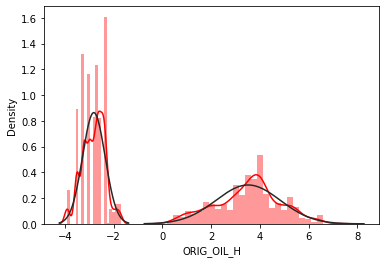

In [ ]:
#log transformation
df_test['DIP'] = np.log(df_test['DIP']) 

#check distribution,skewness and kurtosis
sns.distplot(df_test['DIP'], fit=norm,color ="r")
print("Skew after Log Transformation: %f" % df_test['DIP'].skew())
print("Kurtosis after Log Transformation: %f" % kurtosis(df_test['DIP'],fisher = False))
df_test['DIP'].describe()

#log transformation
df_test['ORIG_OIL_H'] = np.sqrt(df_test['ORIG_OIL_H']) 

#check distribution,skewness and kurtosis
sns.distplot(df_test['ORIG_OIL_H'], fit=norm,color ="r")
print("Skew after Log Transformation: %f" % df_test['ORIG_OIL_H'].skew())
print("Kurtosis after Log Transformation: %f" % kurtosis(df_test['ORIG_OIL_H'],fisher = False))
df_test['ORIG_OIL_H'].describe()

Skew after Log Transformation: -0.588128
Kurtosis after Log Transformation: 2.255757


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    1544.000000
mean        1.394068
std         0.646362
min         0.000000
25%         0.865535
50%         1.561702
75%         1.917745
max         2.375947
Name: TOTAL_INJ, dtype: float64

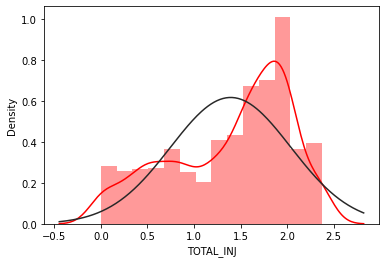

In [ ]:
df_test['TOTAL_INJ'] = df_test['TOTAL_INJ']/1e8

#log transformation
df_test['TOTAL_INJ'] = np.log(df_test['TOTAL_INJ']+1) 
#df_test['TOTAL_INJ'] = np.sqrt(df_test['TOTAL_INJ']) 

#check distribution,skewness and kurtosis
sns.distplot(df_test['TOTAL_INJ'], fit=norm,color ="r")
print("Skew after Log Transformation: %f" % df_test['TOTAL_INJ'].skew())
print("Kurtosis after Log Transformation: %f" % kurtosis(df_test['TOTAL_INJ'],fisher = False))
df_test['TOTAL_INJ'].describe()

In [ ]:
df_test = df_test.reindex(columns=df_train_data.columns)
df_test.head()

,CMPL_FAC_ID,SAND,DIP,AVG_ORIG_OIL_SAT,ORIG_OIL_H,TOTAL_INJ,TOTAL_GNTL_INJ,Lin_Dist_Inj_Factor,SGMT_CUM_STM_INJ_1,FT_DIST_PAT_1,SGMT_CUM_STM_INJ_2,FT_DIST_PAT_2,SGMT_CUM_STM_INJ_3,FT_DIST_PAT_3,TOTAL_PROD,Lin_Dist_Prod_Factor,SURV_DTE_YEAR,SURV_DTE_MONTH
0,126055,10,-2.525729,0.39,4.690416,0.000000,0,0.329,0.0,79.0,0.0,431.0,0.0,449.0,0,0.540489,1990,1
1,126055,10,-2.525729,0.39,4.690416,0.232801,1254604,0.329,103853.0,79.0,142241.0,431.0,89915.0,449.0,740546,0.540489,2004,1
2,126055,10,-2.525729,0.39,4.690416,0.311893,2185281,0.341,163351.0,79.0,234579.0,431.0,138540.0,449.0,1035284,0.549631,2005,1
3,126055,10,-2.525729,0.39,4.690416,0.382225,3013624,0.368,345766.0,79.0,340704.0,431.0,201144.0,449.0,1249636,0.545968,2006,1
4,126055,10,-2.525729,0.39,4.690416,0.448727,3798806,0.392,470827.0,79.0,423345.0,431.0,234398.0,449.0,1568059,0.529917,2007,1


In [ ]:
df_test.columns

Index(['CMPL_FAC_ID', 'SAND', 'DIP', 'AVG_ORIG_OIL_SAT', 'ORIG_OIL_H',
       'TOTAL_INJ', 'TOTAL_GNTL_INJ', 'Lin_Dist_Inj_Factor',
       'SGMT_CUM_STM_INJ_1', 'FT_DIST_PAT_1', 'SGMT_CUM_STM_INJ_2',
       'FT_DIST_PAT_2', 'SGMT_CUM_STM_INJ_3', 'FT_DIST_PAT_3', 'TOTAL_PROD',
       'Lin_Dist_Prod_Factor', 'SURV_DTE_YEAR', 'SURV_DTE_MONTH'],
      dtype='object')

In [ ]:
xtest = scaler.transform(X=df_test.values)
xtest[:3]

array([[0.12464824, 0.52631579, 0.5896849 , 0.47560976, 0.62653031,
        0.        , 0.        , 0.36751152, 0.        , 0.14087302,
        0.        , 0.73333333, 0.        , 0.61904762, 0.        ,
        0.6332516 , 0.        , 0.        ],
       [0.12464824, 0.52631579, 0.5896849 , 0.47560976, 0.62653031,
        0.0112442 , 0.06135351, 0.36751152, 0.03389835, 0.14087302,
        0.02866656, 0.73333333, 0.01916287, 0.61904762, 0.00860461,
        0.6332516 , 0.46666667, 0.        ],
       [0.12464824, 0.52631579, 0.5896849 , 0.47560976, 0.62653031,
        0.01506431, 0.10686612, 0.38133641, 0.05331892, 0.14087302,
        0.04727591, 0.73333333, 0.02952593, 0.61904762, 0.01202925,
        0.64416451, 0.5       , 0.        ]])

# Model Predictions

In [ ]:
y_preds_dl = model.predict(xtest)
y_preds_automl = automl.predict(xtest)
y_preds_gb = model2.predict(xtest)
y_preds_huber = s.predict(xtest)
y_preds_gbr = model_gbr.predict(xtest)

In [ ]:
y_preds = .3*y_preds_dl+.7*(y_preds_huber.reshape((len(y_preds_huber), 1))*.15+y_preds_gbr.reshape((len(y_preds_gbr), 1))*.15+y_preds_gb.reshape((len(y_preds_gb), 1))*.7)
y_preds = y_preds.flatten()
y_preds.shape

(1504,)

In [ ]:
copy_test_val = df_test[:].copy().reset_index(drop= True)
copy_test_val.head()

for id in copy_test_val['CMPL_FAC_ID'].unique():
    for sand in copy_test_val['SAND'].unique():
        c = copy_test_val[(copy_test_val['CMPL_FAC_ID'] == id) & (copy_test_val['SAND'] == sand)].index.tolist()
        if len(c) < 2 :
            continue
        for t in range(0,len(c)-1):
            if y_preds[c[t]] > y_preds[c[t]+1] :
                print(c)
                print(id, sand, t)
                y_preds[c[t]] = y_preds[c[t]+1]


[110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
142187 12 2
[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
142187 9 9
[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
142187 14 9
[83, 84, 85, 86, 87]
142187 7 1
[83, 84, 85, 86, 87]
142187 7 2
[83, 84, 85, 86, 87]
142187 7 3
[88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
142187 11 9
[144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]
142187 17 9
[203, 204, 205, 206, 207, 208]
142231 16 3
[177, 178, 179, 180, 181, 182]
142231 9 4
[284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294]
142259 10 2
[284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294]
142259 10 4
[284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294]
142259 10 6
[284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294]
142259 10 7
[317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327]
142259 12 4
[317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327]
142259 12 9
[339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349]
142259 16 4
[222, 223, 224, 225, 226, 227, 228, 2

In [ ]:
t=0
for i in range (0,len(df_test['TOTAL_GNTL_INJ'])):
    if df_test['TOTAL_GNTL_INJ'][i] == 0:
        y_preds[i] = 0
        t = t+1
print(t)
y_preds

109


array([0.13350362, 0.29805708, 0.6258765 , ..., 0.        , 0.19617942,
       0.        ])

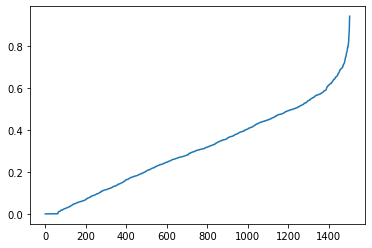

In [ ]:
%matplotlib inline
a = np.sort(y_preds)
plt.plot(a)
plt.show()

In [ ]:
df_y_preds = pd.DataFrame()
df_y_preds['PCT_DESAT_TO_ORIG'] = y_preds
df_y_preds

,PCT_DESAT_TO_ORIG
0,0.076253
1,0.214270
2,0.389338
3,0.409646
4,0.454723
...,...
1499,0.001937
1500,0.237689
1501,0.001766
1502,0.252779


# Submission File

In [ ]:
submission_filepath = 'submission.csv'#path and file name for your prediction on the train dataset
df_y_preds.to_csv(submission_filepath,index=False)